## Goals

This notebook performs some miscellaneous data visualizations/collections that labmates have asked for.

## Inputs

### Imports

In [1]:
import pandas as pd
import os
from IPython.display import display
import math
import plotnine as p9
import numpy as np
from adjustText import adjust_text

### Input data

In [2]:
# Differential RNASeq data
differential_rnaseq_output_folder = "../output/"

# Read in differential rnaseq data
rnaseq_df = pd.read_csv(
    f"{differential_rnaseq_output_folder}/differential_gene_expression_all_sensitive_resistant_pairs.csv",
    sep=",",
    index_col=0,
)

display(rnaseq_df)

,num_pairs_sig_regulated,num_pairs_sig_up_regulated,num_pairs_sig_down_regulated,OVCAR3A_vs_OVCAR3_padj,OVCAR3A_vs_OVCAR3_l2fc,OVCAR3B_vs_OVCAR3_padj,OVCAR3B_vs_OVCAR3_l2fc,OVCAR4A_vs_OVCAR4_padj,OVCAR4A_vs_OVCAR4_l2fc,OVCAR4B_vs_OVCAR4_padj,OVCAR4B_vs_OVCAR4_l2fc,PEA2_vs_PEA1_padj,PEA2_vs_PEA1_l2fc,PEO6_vs_PEO1_padj,PEO6_vs_PEO1_l2fc,PEO4_vs_PEO1_padj,PEO4_vs_PEO1_l2fc
LINC00960,7,0,7,1.187281e-07,-2.073400,0.000047,-2.527692,1.711537e-02,-3.675358,4.078746e-05,-3.515520,4.822980e-04,-6.832531,1.302699e-09,-1.955783,1.288730e-03,-0.811929
NR2F1,7,0,7,1.883640e-04,-1.264836,0.000002,-2.468650,4.773484e-03,-1.749114,1.011641e-11,-9.343252,2.829691e-02,-3.466660,2.232610e-05,-1.201668,2.109636e-65,-3.935971
NREP,7,0,7,6.838092e-09,-0.830170,0.005919,-1.183430,7.123701e-40,-3.263344,1.698330e-94,-5.836036,4.457254e-08,-1.565826,8.127607e-16,-2.006884,7.999280e-04,-0.615674
TOX,7,0,7,1.395964e-07,-1.078431,0.020586,-1.085739,1.972261e-03,-1.249937,2.976978e-31,-2.847134,5.048540e-08,-4.283229,1.721373e-03,-2.065090,1.281240e-12,-4.960952
CLSTN2,7,1,6,6.998658e-23,-2.763888,0.018947,1.531774,2.132812e-03,-1.372805,6.587796e-19,-4.481249,3.675334e-09,-5.751861,4.238404e-05,-2.045382,7.137069e-05,-1.040207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZSCAN5B,0,0,0,NaN,NaN,NaN,1.696458,NaN,-0.300562,NaN,0.323026,NaN,-1.385006,NaN,-1.210058,9.079384e-01,0.874065
ZSWIM2,0,0,0,1.201229e-01,1.798115,0.691177,-2.316592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.658783e-01,3.267871
ZSWIM5,0,0,0,6.050989e-01,-0.472029,0.740917,-0.800814,NaN,1.590960,2.947125e-01,2.923685,NaN,1.235677,1.310988e-01,0.830446,7.356236e-01,-0.353043
ZSWIM8-AS1,0,0,0,8.778595e-01,-0.160627,0.991453,-0.034603,9.596558e-01,0.109060,3.455695e-01,1.195076,5.485057e-01,0.767788,1.961409e-01,1.323586,8.611924e-01,0.368861


In [3]:
sensitive_resistant_pairs = [
    "OVCAR3-ResA_vs_OVCAR3",
    "OVCAR3-ResB_vs_OVCAR3",
    "OVCAR4-ResA_vs_OVCAR4",
    "OVCAR4-ResB_vs_OVCAR4",
    "PEO6_vs_PEO1",
    "PEO4_vs_PEO1",
    "PEA2_vs_PEA1",
]


class Isoline:
    def __init__(self, name, sensitive_line, resistant_lines):
        self.name = name
        self.sensitive_line = sensitive_line
        self.resistant_lines = resistant_lines
        self.all_lines = resistant_lines.copy()
        self.all_lines.append(sensitive_line)


isolines = [
    Isoline("OVCAR3", "OVCAR3", ["OVCAR3A", "OVCAR3B"]),
    Isoline("OVCAR4", "OVCAR4", ["OVCAR4A", "OVCAR4B"]),
    Isoline("PEO", "PEO1", ["PEO4", "PEO6"]),
    Isoline("PEA", "PEA1", ["PEA2"]),
]

# Print command and run command
def run_command(cmd):
    print(f"cmd: {cmd}")
    os.system(cmd)

#### Volcano plot of NOX4 RNASeq data across all isogenic pairs

In [4]:
def volcano_plot_rnaseq_gene(gene_rnaseq_data, title):
    # Reformat data for volcano plot
    plot_data = pd.DataFrame(columns=["pair", "l2fc", "-log10(padj)"])
    for isoline in isolines:
        for cellline in isoline.resistant_lines:
            pair = f"{cellline}_vs_{isoline.sensitive_line}"
            plot_data.loc[len(plot_data)] = [
                pair,
                gene_rnaseq_data[f"{pair}_l2fc"].iloc[0],
                -math.log10(gene_rnaseq_data[f"{pair}_padj"].iloc[0]),
            ]
    display(plot_data)

    # Plot data
    p = (
        p9.ggplot(plot_data, p9.aes(x="l2fc", y="-log10(padj)", label="pair"))
        + p9.geom_point(size=1)
        + p9.geom_text(
            size=8,
            nudge_y=0.2,
            show_legend=False,
            adjust_text={
                "expand_points": (1.5, 1.5),
                "arrowprops": {"arrowstyle": "->", "color": "gray"},
            },
        )
        + p9.geom_vline(xintercept=0, linetype="dashed")
        + p9.geom_hline(yintercept=-math.log10(0.05), linetype="dashed")
        + p9.scale_color_gradient2(
            low="blue", mid="white", high="red", midpoint=0, limits=(-4, 4)
        )
        + p9.theme_bw()
        + p9.labs(
            title=title,
            x="log2 fold change",
            y="-log10 adjusted p-value",
            color="log2 fold change",
        )
    )
    display(p)

,pair,l2fc,-log10(padj)
0,OVCAR3A_vs_OVCAR3,-3.590051,21.020265
1,OVCAR3B_vs_OVCAR3,-3.182406,7.738374
2,OVCAR4A_vs_OVCAR4,-2.212455,6.663586
3,OVCAR4B_vs_OVCAR4,-3.315644,10.627351
4,PEO4_vs_PEO1,-1.975526,8.762916
5,PEO6_vs_PEO1,0.813031,1.781704
6,PEA2_vs_PEA1,-7.049669,8.558645


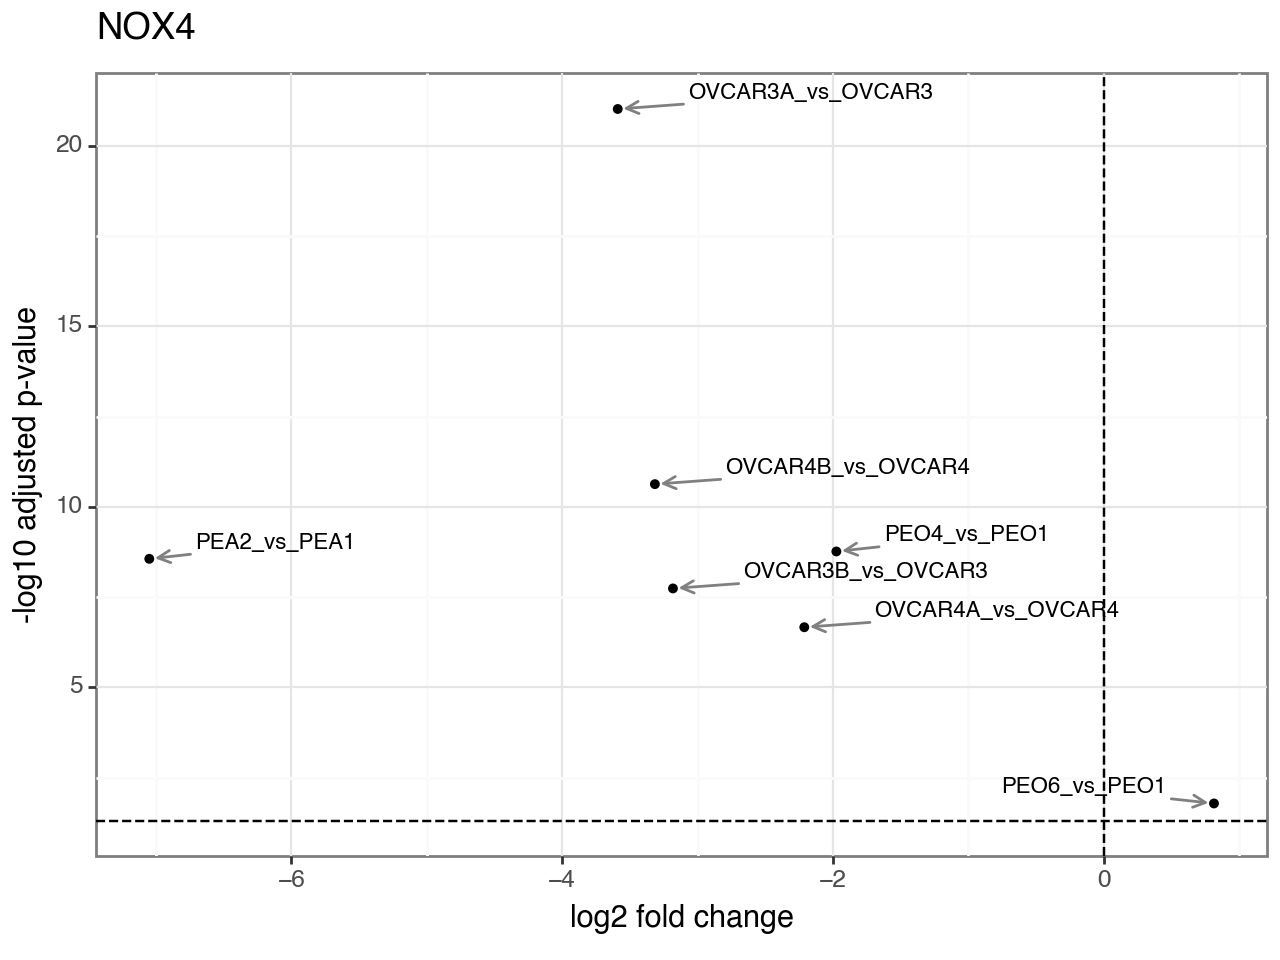

<Figure Size: (640 x 480)>

In [5]:
nox4_rnaseq = rnaseq_df.loc[["NOX4"]]
volcano_plot_gene = volcano_plot_rnaseq_gene(nox4_rnaseq, "NOX4")

#### Consistently downregulated genes

In [6]:
rnaseq_df["down_in_all_pairs"] = True
rnaseq_df["down_in_both_OVCAR4_pairs"] = True

for index, row in rnaseq_df.iterrows():
    for isoline in isolines:
        for cellline in isoline.resistant_lines:
            pair = f"{cellline}_vs_{isoline.sensitive_line}"
            l2fc = row[f"{pair}_l2fc"]
            padj = row[f"{pair}_padj"]
            if np.isnan(l2fc) or np.isnan(padj) or not (l2fc < 1 and padj < 0.05):
                rnaseq_df.loc[index, "down_in_all_pairs"] = False

    for isoline in isolines:
        for cellline in isoline.resistant_lines:
            if (isoline.name != "OVCAR4"): # Only care about OVCAR4 lines here
                continue
            pair = f"{cellline}_vs_{isoline.sensitive_line}"
            l2fc = row[f"{pair}_l2fc"]
            padj = row[f"{pair}_padj"]
            if np.isnan(l2fc) or np.isnan(padj) or not (l2fc < 1 and padj < 0.05):
                rnaseq_df.loc[index, "down_in_both_OVCAR4_pairs"] = False

display("Downregulated in all celllines")
display(rnaseq_df[rnaseq_df["down_in_all_pairs"] == True])

display("downregulated in both OVCAR4A and OVCAR4B")
display(rnaseq_df[rnaseq_df["down_in_both_OVCAR4_pairs"] == True])

'Downregulated in all celllines'

,num_pairs_sig_regulated,num_pairs_sig_up_regulated,num_pairs_sig_down_regulated,OVCAR3A_vs_OVCAR3_padj,OVCAR3A_vs_OVCAR3_l2fc,OVCAR3B_vs_OVCAR3_padj,OVCAR3B_vs_OVCAR3_l2fc,OVCAR4A_vs_OVCAR4_padj,OVCAR4A_vs_OVCAR4_l2fc,OVCAR4B_vs_OVCAR4_padj,OVCAR4B_vs_OVCAR4_l2fc,PEA2_vs_PEA1_padj,PEA2_vs_PEA1_l2fc,PEO6_vs_PEO1_padj,PEO6_vs_PEO1_l2fc,PEO4_vs_PEO1_padj,PEO4_vs_PEO1_l2fc,down_in_all_pairs,down_in_both_OVCAR4_pairs
LINC00960,7,0,7,1.187281e-07,-2.073400,4.701905e-05,-2.527692,1.711537e-02,-3.675358,4.078746e-05,-3.515520,4.822980e-04,-6.832531,1.302699e-09,-1.955783,1.288730e-03,-0.811929,True,True
NR2F1,7,0,7,1.883640e-04,-1.264836,1.924134e-06,-2.468650,4.773484e-03,-1.749114,1.011641e-11,-9.343252,2.829691e-02,-3.466660,2.232610e-05,-1.201668,2.109636e-65,-3.935971,True,True
NREP,7,0,7,6.838092e-09,-0.830170,5.918867e-03,-1.183430,7.123701e-40,-3.263344,1.698330e-94,-5.836036,4.457254e-08,-1.565826,8.127607e-16,-2.006884,7.999280e-04,-0.615674,True,True
TOX,7,0,7,1.395964e-07,-1.078431,2.058567e-02,-1.085739,1.972261e-03,-1.249937,2.976978e-31,-2.847134,5.048540e-08,-4.283229,1.721373e-03,-2.065090,1.281240e-12,-4.960952,True,True
NOX4,7,1,6,9.544101e-22,-3.590051,1.826525e-08,-3.182406,2.169770e-07,-2.212455,2.358572e-11,-3.315644,2.762834e-09,-7.049669,1.653087e-02,0.813031,1.726171e-09,-1.975526,True,True
GPR161,7,2,5,1.799137e-10,-1.013376,2.439536e-02,-1.196135,4.212400e-03,0.911001,7.695400e-04,0.862172,6.254633e-10,-2.271919,1.714246e-03,-1.040121,2.429502e-03,-0.738613,True,True
KCNQ5,7,2,5,2.262625e-58,-4.203884,1.162308e-11,-2.578340,1.341001e-02,-6.996403,3.003884e-13,-9.781022,4.277223e-26,-2.983252,9.714890e-04,0.979127,1.100350e-04,0.871927,True,True
ZNF229,7,2,5,7.432660e-04,-0.794170,2.430352e-03,-1.296026,3.869470e-04,-1.922442,8.502807e-09,-2.776633,5.811263e-09,-1.215104,1.145136e-02,0.657624,1.383394e-02,0.439454,True,True
ZNF320,7,2,5,2.250590e-26,-2.369591,1.475178e-02,-0.956862,7.721443e-16,-2.870455,1.603565e-27,-3.396559,9.233151e-09,-1.413867,4.322828e-03,0.799958,1.937237e-02,0.452199,True,True
DCDC2,7,4,3,2.701868e-71,-2.102950,1.580206e-13,-2.256045,1.124203e-02,0.882604,1.265424e-03,0.891389,1.052210e-16,-1.740159,3.284680e-04,0.964398,1.907418e-07,0.844081,True,True


'downregulated in both OVCAR4A and OVCAR4B'

,num_pairs_sig_regulated,num_pairs_sig_up_regulated,num_pairs_sig_down_regulated,OVCAR3A_vs_OVCAR3_padj,OVCAR3A_vs_OVCAR3_l2fc,OVCAR3B_vs_OVCAR3_padj,OVCAR3B_vs_OVCAR3_l2fc,OVCAR4A_vs_OVCAR4_padj,OVCAR4A_vs_OVCAR4_l2fc,OVCAR4B_vs_OVCAR4_padj,OVCAR4B_vs_OVCAR4_l2fc,PEA2_vs_PEA1_padj,PEA2_vs_PEA1_l2fc,PEO6_vs_PEO1_padj,PEO6_vs_PEO1_l2fc,PEO4_vs_PEO1_padj,PEO4_vs_PEO1_l2fc,down_in_all_pairs,down_in_both_OVCAR4_pairs
LINC00960,7,0,7,1.187281e-07,-2.073400,0.000047,-2.527692,1.711537e-02,-3.675358,4.078746e-05,-3.515520,4.822980e-04,-6.832531,1.302699e-09,-1.955783,1.288730e-03,-0.811929,True,True
NR2F1,7,0,7,1.883640e-04,-1.264836,0.000002,-2.468650,4.773484e-03,-1.749114,1.011641e-11,-9.343252,2.829691e-02,-3.466660,2.232610e-05,-1.201668,2.109636e-65,-3.935971,True,True
NREP,7,0,7,6.838092e-09,-0.830170,0.005919,-1.183430,7.123701e-40,-3.263344,1.698330e-94,-5.836036,4.457254e-08,-1.565826,8.127607e-16,-2.006884,7.999280e-04,-0.615674,True,True
TOX,7,0,7,1.395964e-07,-1.078431,0.020586,-1.085739,1.972261e-03,-1.249937,2.976978e-31,-2.847134,5.048540e-08,-4.283229,1.721373e-03,-2.065090,1.281240e-12,-4.960952,True,True
CLSTN2,7,1,6,6.998658e-23,-2.763888,0.018947,1.531774,2.132812e-03,-1.372805,6.587796e-19,-4.481249,3.675334e-09,-5.751861,4.238404e-05,-2.045382,7.137069e-05,-1.040207,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TFE3,2,2,0,6.050989e-01,0.103012,0.843262,0.190957,3.343783e-03,0.859145,7.272605e-03,0.830219,6.637590e-01,-0.121781,5.036351e-02,-0.498146,1.647320e-01,0.296775,False,True
TSPAN6,2,2,0,8.030579e-01,0.040320,0.133139,-0.624658,6.608032e-03,0.685456,5.664524e-03,0.700451,6.610711e-01,0.141796,8.018865e-01,0.088923,9.030808e-01,0.063037,False,True
WWC3,2,2,0,2.202458e-01,-0.298311,0.243224,0.631606,3.701439e-02,0.535399,1.426054e-02,0.599890,1.870479e-01,0.341489,2.100753e-01,0.364537,2.293274e-01,0.307471,False,True
XRRA1,2,2,0,8.903164e-01,-0.040302,0.917458,0.140490,7.800243e-03,0.793741,1.683307e-02,0.735252,2.038754e-01,-0.444495,9.567825e-02,0.490046,5.426491e-01,0.192419,False,True
